# Regression Analysis

This Jupyter Notebook is part of the time travel distance project. In this notebook we use linear regression to estimate the travel duration between the Tübinger town hall (start location) and various places in Tübingen. 

In [55]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

from IPython.display import Image
from IPython.core.display import HTML 

In [56]:
# read data
df = pd.read_csv('data/combined_data.csv')

In [57]:
# convert to dummy variables for nested models
df['isWalking'] = df['mode'].isin(['walking'])
df['isBicycling'] = df['mode'].isin(['bicycling', 'walking'])

# baseline aplies to:       driving,bicycling and walking
# isBicycling applies to:   bicycling and walking
# isWalking applies to:     walking

# Only horizontal Model

In this model, we only consider the horizontal distance (for each mean of transport seperately) as predictor. 

In [58]:
# create and fit model
model_horiz = smf.ols(formula='duration ~ distance_horizontal + distance_horizontal:isBicycling + distance_horizontal:isWalking - 1', data=df)
fit_horiz = model_horiz.fit()

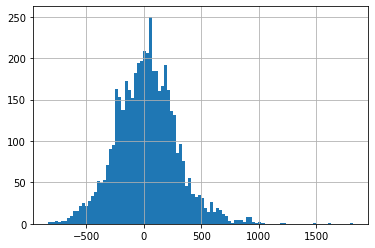

In [59]:
# residuals plot
fit_horiz.resid.hist(bins=100);

In [60]:
fit_horiz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               duration   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          5.260e+04
Date:                Sat, 29 Jan 2022   Prob (F-statistic):                        0.00
Time:                        23:42:27   Log-Likelihood:                         -33645.
No. Observations:                4800   AIC:                                  6.730e+04
Df Residuals:                    4797   BIC:                                  6.732e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
distance_horizontal                         0.2663      0.003     97.795      0.000       0.261       0.272
distance_horizontal:isBicycling[T.True]     0.1473      0.004     38.219      0.000       0.140       0.155
distance_horizontal:isWalking[T.True]       0.5514      0.004    143.008      0.000       0.544       0.559
==============================================================================
Omnibus:                      255.999   Durbin-Watson:                   0.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              524.049
Skew:                           0.371   Prob(JB):                    1.60e-114
Kurtosis:                       4.439   Cond. No.                         4.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Combined Model

In this model, we consider the horizontal distance (for each mean of transport seperately) and the  vertical distance (for each mean of transport seperately) as predictors. 

In [27]:
# create and fit
model_combi_abs = smf.ols(formula='duration ~ distance_horizontal + distance_horizontal:isBicycling + distance_horizontal:isWalking + distance_vertical_abs + distance_vertical_abs:isBicycling + distance_vertical_abs:isWalking - 1', data=df)
fit_combi_abs = model_combi_abs.fit()


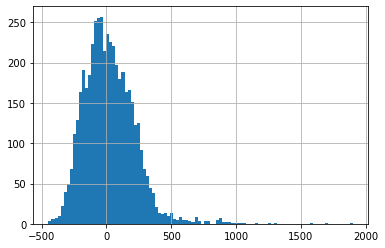

In [28]:
# residuals plot
fit_combi_abs.resid.hist(bins=100);

In [29]:
fit_combi_abs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               duration   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          4.748e+04
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                        0.00
Time:                        12:16:46   Log-Likelihood:                         -32257.
No. Observations:                4800   AIC:                                  6.453e+04
Df Residuals:                    4794   BIC:                                  6.457e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
distance_horizontal                           0.2481      0.003     77.597      0.000       0.242       0.254
distance_horizontal:isBicycling[T.True]       0.0322      0.005      7.016      0.000       0.023       0.041
distance_horizontal:isWalking[T.True]         0.6018      0.005    129.253      0.000       0.593       0.611
distance_vertical_abs                         0.9326      0.126      7.401      0.000       0.686       1.180
distance_vertical_abs:isBicycling[T.True]     5.4756      0.177     30.967      0.000       5.129       5.822
distance_vertical_abs:isWalking[T.True]      -2.4277      0.175    -13.834      0.000      -2.772      -2.084
==============================================================================
Omnibus:                     1421.045   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7911.518
Skew:                           1.300   Prob(JB):                         0.00
Kurtosis:                       8.726   Cond. No.                         247.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Convert estaimates from seconds per meter (sec/m) to kilometer per hour (km/h)

In [54]:
# compute km/h
speeds = []
arr = []

print('\nFinal estimates in km/h:')

for i,param,name in zip(range(len(fit_combi_abs.params)),fit_combi.params, fit_combi.params.keys()):
    if i % 3 == 0:
        arr = []
    arr.append(param)
    
    speeds.append(round(60*60/np.sum(arr)/1000,3))
    print(name, ': ', speeds[-1])

print('\nRatio between horizontal and vertical speed:')
print('Driving: ', round(speeds[0] / speeds[3],3))
print('Bicycling: ', round(speeds[1] / speeds[4],3))
print('Walking: ', round(speeds[2] / speeds[5],3))


Final estimates in km/h:
distance_horizontal :  17.028
distance_horizontal:isBicycling[T.True] :  12.752
distance_horizontal:isWalking[T.True] :  4.039
distance_vertical_pos :  1.954
distance_vertical_pos:isBicycling[T.True] :  0.566
distance_vertical_pos:isWalking[T.True] :  0.959

Ratio between horizontal and vertical speed:
Driving:  8.714
Bicycling:  22.53
Walking:  4.212


In [14]:
Image(url= "https://nationaler-radverkehrsplan.de/sites/default/files/images/nachrichten/srv-2018-06-weghaeufigkeit-vergleich-fahrrad-pedelec-topografie.jpg")

# Comparison

### BIC

In [38]:
print('Only Horizontal:\t \t', round(fit_horiz.bic))
print('Horizontal + Vertical: \t\t', round(fit_combi_abs.bic))

Only Horizontal:	 	 67315.0
Horizontal + Vertical: 		 64566.0
Horizontal + Uphill + Downhill:  64311.0


### Mean absolute error

In [39]:
print('Only Horizontal: \t\t', round(np.mean(np.abs(fit_horiz.resid))/60, 2))
print('Horizontal + Vertical: \t\t', round(np.mean(np.abs(fit_combi_abs.resid))/60, 2))

Only Horizontal: 		 3.43
Horizontal + Vertical: 		 2.51
Horizontal + Uphill + Downhill:  2.41


### Mean relative error

In [61]:
print('Only Horizontal: \t\t', round(np.mean(np.abs(fit_horiz.resid) / df.duration), 2))
print('Horizontal + Vertical: \t\t', round(np.mean(np.abs(fit_combi_abs.resid) / df.duration), 2))

Only Horizontal: 		 0.22
Horizontal + Vertical: 		 0.16


## Store residuals

In [62]:
df['resid_combi_abs'] = fit_combi_abs.resid
df['resid_horiz'] = fit_horiz.resid
df.to_csv('data/combined_data_residuals.csv')

## Store models

In [63]:
fit_horiz.save("models/fit_horiz.pickle")
fit_combi_abs.save("models/fit_combi_abs.pickle")